# JOBarcelona ’22 | Data Science Challenge - Luis Carranza

In this challenge, we are asked to build a predictive model for insect types. In order to achieve this goal, we are given a dataset with rows of sensors signals at a specific hour-minute.

In this report, I will present the following steps:
1. Exploratory Data Analysis
2. ML Experiments
3. Conclusion

## 1. Exploratory Data Analysis

In this section, I will follow a general but complete EDA pipeline that will help us get a better understanding of the variables so better model approaches can be taken. This pipeline consists of the following steps:

1. Data Cleaning
    1. Missing values
    2. Incorrect Headers
    3. Merge variables
2. Univariate Analysis
3. Bivariate Analysis
    1. Numeric-Numeric Analysis
        1. Pair Plot
        1. Correlation Matrix

In [1]:
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the dataset
df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
0,0,22,26,119.910995,242.838324,-316.819222,250.195048,-53.547777,-112.049983,2
1,1,10,16,-90.790536,-269.470767,-182.581844,95.394941,37.291944,48.525180,0
2,2,21,42,-20.028003,-147.070212,50.280872,-90.750386,-50.476556,85.399009,1
3,3,21,17,-21.258567,0.467070,-86.164153,-21.813529,-209.256006,16.291882,0
4,4,18,16,-58.154501,-13.051195,-156.501167,48.392938,-110.008860,-10.285138,2


### 1. Data Cleansing

The beggining of this step will be checking if there are some missing values among the variables

In [3]:
# Checking the missing values
df.isnull().sum()

Unnamed: 0           0
Hour                 0
Minutes              0
Sensor_alpha         0
Sensor_beta          0
Sensor_gamma         0
Sensor_alpha_plus    0
Sensor_beta_plus     0
Sensor_gamma_plus    0
Insect               0
dtype: int64

Looks nice! Now, since the first column which resembles the Id, it is possible to rename it like it. What's more, it is also suitable to merge the columns Hour and Minutes to get the time as an ordered new variable.

In [4]:
df = df.rename(columns={ df.columns[0]: "Id" })
df["Time"] = df["Hour"]*60 + df["Minutes"]
df = df.rename(columns = {'Insect':'Insect_old'})
df["Insect"] = df["Insect_old"]
df = df.drop(columns=["Insect_old"], axis=1)
df.head()

,Id,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Time,Insect
0,0,22,26,119.910995,242.838324,-316.819222,250.195048,-53.547777,-112.049983,1346,2
1,1,10,16,-90.790536,-269.470767,-182.581844,95.394941,37.291944,48.525180,616,0
2,2,21,42,-20.028003,-147.070212,50.280872,-90.750386,-50.476556,85.399009,1302,1
3,3,21,17,-21.258567,0.467070,-86.164153,-21.813529,-209.256006,16.291882,1277,0
4,4,18,16,-58.154501,-13.051195,-156.501167,48.392938,-110.008860,-10.285138,1096,2


### 2. Univariate Analysis

Analysis for each of these variables will be performed individually

In [5]:
# Hour variable
df.Hour.describe()

count    7001.000000
mean       19.598914
std         3.507008
min         1.000000
25%        19.000000
50%        21.000000
75%        21.000000
max        23.000000
Name: Hour, dtype: float64

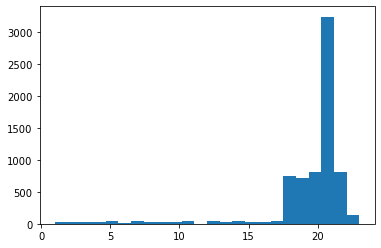

In [6]:
plt.hist(df.Hour, bins = 24)
plt.show()

In [7]:
# Time variable
df.Time.describe()

count    7001.000000
mean     1205.340808
std       210.956044
min        61.000000
25%      1177.000000
50%      1272.000000
75%      1305.000000
max      1439.000000
Name: Time, dtype: float64

In [8]:
# Sensor_alpha, beta, gamma variables
df.Sensor_alpha.describe()

count    7001.000000
mean        0.477171
std        99.294856
min      -404.898823
25%       -68.573905
50%        -0.287447
75%        66.480795
max       351.256221
Name: Sensor_alpha, dtype: float64

In [9]:
df.Sensor_beta.describe()

count    7001.000000
mean      -29.974117
std       133.095125
min      -656.272666
25%      -116.060383
50%       -36.171567
75%        56.637778
max       518.395878
Name: Sensor_beta, dtype: float64

In [10]:
df.Sensor_gamma.describe()

count    7001.000000
mean       -5.624690
std       115.871391
min      -448.478039
25%       -83.508747
50%        -1.217606
75%        76.870277
max       378.349287
Name: Sensor_gamma, dtype: float64

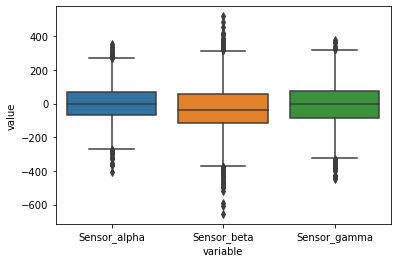

In [11]:
df_sensor_boxplot =df.filter(["Sensor_alpha", "Sensor_beta", "Sensor_gamma"])
sns.boxplot(x="variable", y="value", data=pd.melt(df_sensor_boxplot))
plt.show()

In [12]:
# Sensor_alpha_plus, Sensor_beta_plus, Sensor_gamma_plus variables
df.Sensor_alpha_plus.describe()

count    7001.000000
mean        7.188060
std       122.327980
min      -437.205393
25%       -79.496687
50%        -1.133567
75%        93.285286
max       462.556319
Name: Sensor_alpha_plus, dtype: float64

In [13]:
df.Sensor_beta_plus.describe()

count    7001.000000
mean       -0.757901
std       100.039477
min      -387.567443
25%       -68.061596
50%        -0.444124
75%        66.181909
max       345.279240
Name: Sensor_beta_plus, dtype: float64

In [14]:
df.Sensor_gamma_plus.describe()

count    7001.000000
mean       -0.554533
std       100.535951
min      -374.961689
25%       -69.652647
50%         0.027128
75%        67.838524
max       363.682391
Name: Sensor_gamma_plus, dtype: float64

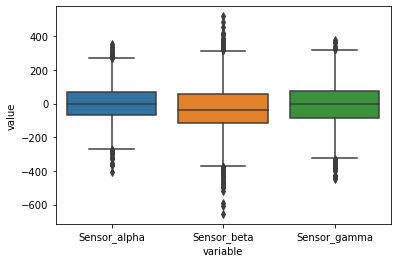

In [15]:
df_sensor_plus_boxplot =df.filter(["Sensor_alpha_plus", "Sensor_beta_plus", "Sensor_gamma_plus"])
sns.boxplot(x="variable", y="value", data=pd.melt(df_sensor_boxplot))
plt.show()

In [16]:
# Unordered Insect variable
df.Insect.value_counts(normalize=True)

0    0.502642
1    0.398943
2    0.098415
Name: Insect, dtype: float64

According to the univariate analysis, most of the data is taken from 19 to 22h. What's more, most of the sensor data comes from positions near them. Finally, the output variable has predominant cases of insect type 0 (Lepidoptero). By this, we can start thinking that when predicting future cases, we will have more robust answers with data between these ranges, where data has been taken at night hours, and in positions near the sensors.

Now, I will start digging deeper into the data with bivariate sensors
### 3. Bivariate analysis

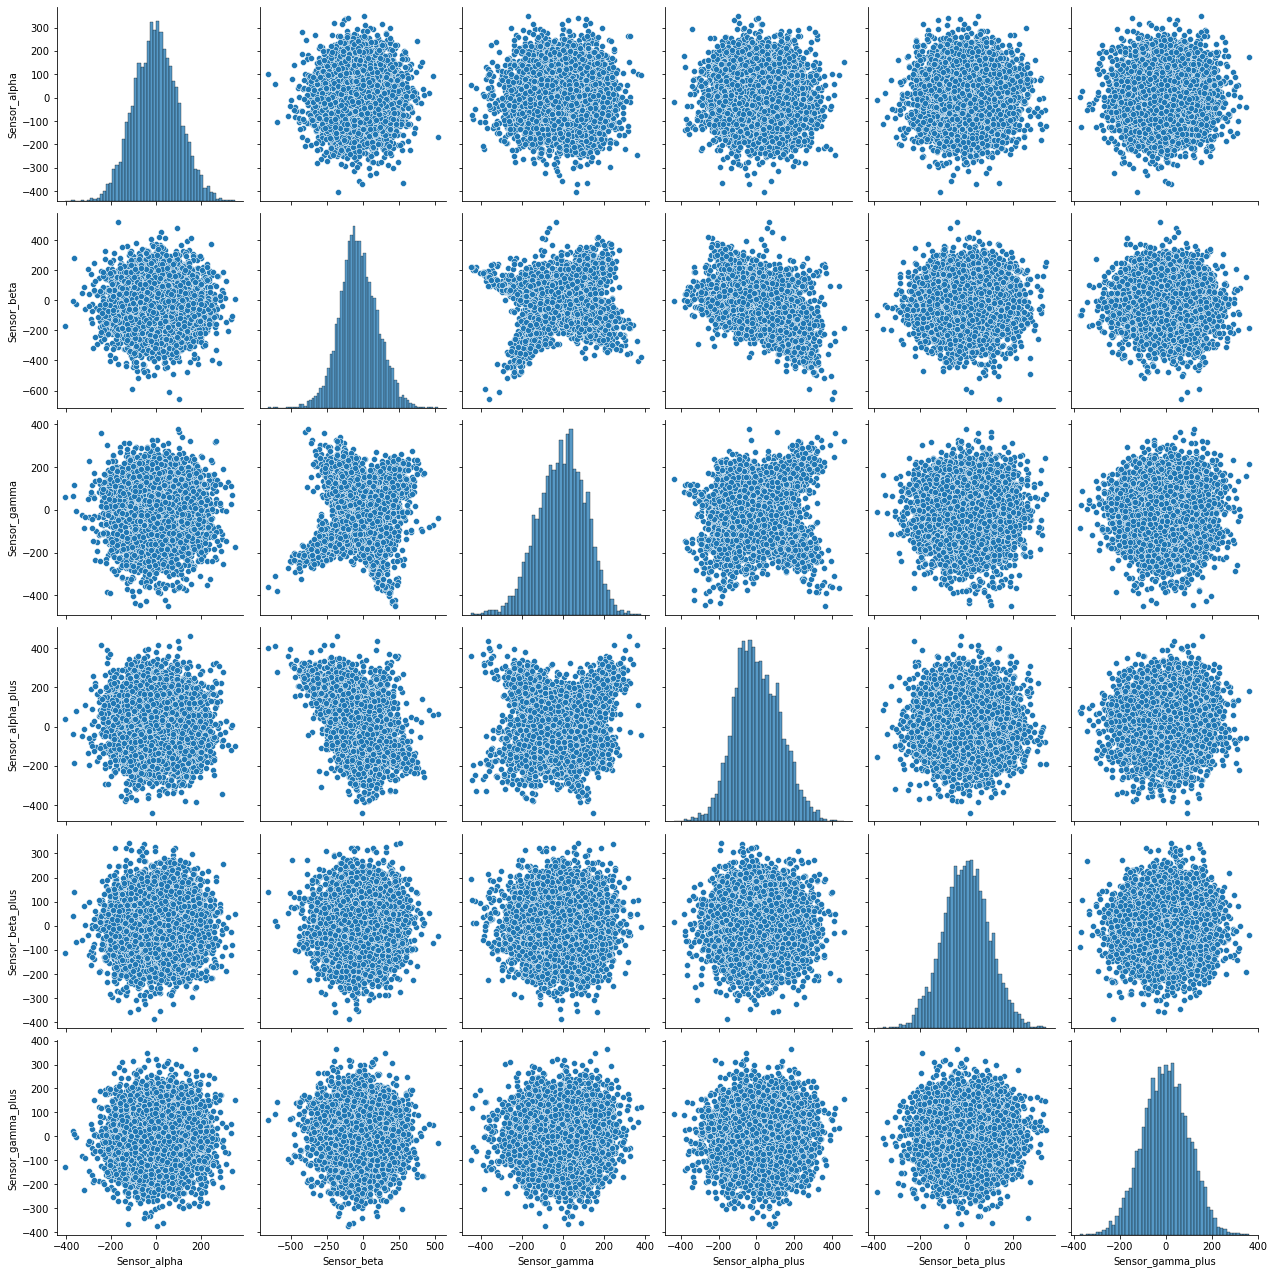

In [17]:
df_bivariate_sensors = df.filter(["Sensor_alpha","Sensor_beta","Sensor_gamma","Sensor_alpha_plus","Sensor_beta_plus","Sensor_gamma_plus"])
sns.pairplot(df_bivariate_sensors, height=3)
plt.show()

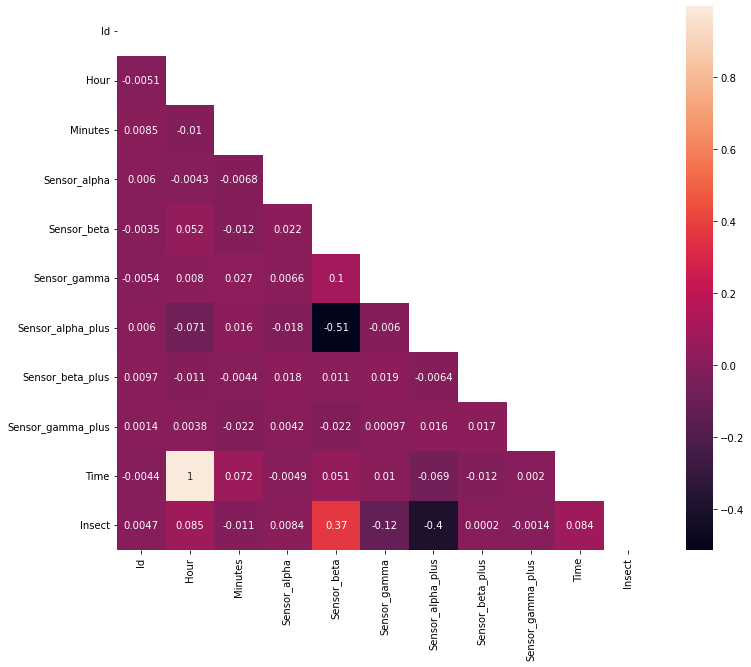

In [18]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor_pearson = df.corr(method ='pearson')
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(cor_pearson)
sns.heatmap(cor_pearson, annot=True, mask=matrix)
plt.show()

By the first graph, which shows a pairplot between the sensor variables, we can see an strong correlation between the Sensor_alpha_plus and Sensor_beta, and a weaker one between Sensor_gamma and Sensor_beta. As for the second graph, this correlation are confirmed. Furthermore, by adding the outcome variable Insect, we can see an important variables are Sensor_alpha_plus-Sensor_beta (which are correlated), Sensor_gamma and Hour-Time. As for the experiments, we will play more with these variables in order to train the best model for this challenge.

## 2. ML Experiments

As for this section, I will be evaluating the dataset with mostly simple models but I will be adding a couple of robust ones as well. I will be also setting different attributes in order to see if the feature importance can increase a bit the accuracy. By this, we have 5 models, each performing 4 cross-validation scores depeding of the atributes given.

1. Decision Trees (Bagging)
2. Random Forest
3. Naive Bayes
4. KNN
5. Linear Regression

In [19]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

### Experiment 1: Decision Trees

In [20]:
feature_cols_beta_time = ['Sensor_alpha_plus', 'Sensor_beta', 'Sensor_gamma', 'Sensor_beta', 'Time']
feature_cols_beta_hour = ['Sensor_alpha_plus', 'Sensor_beta', 'Sensor_gamma', 'Sensor_beta', 'Hour']
feature_cols_nobeta_time = ['Sensor_alpha_plus', 'Sensor_gamma', 'Sensor_beta', 'Time']
feature_cols_nobeta_hour = ['Sensor_alpha_plus', 'Sensor_gamma', 'Sensor_beta', 'Hour']

In [21]:
# get X, y
# you want all rows, and the feature_cols' columns
X = df.loc[:, feature_cols_beta_time]
y = df.Insect
# define the model
model_dt_1 = BaggingClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_dt_1, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.891 (0.010)


In [22]:
# get X, y
# you want all rows, and the feature_cols' columns
X = df.loc[:, feature_cols_beta_hour]
y = df.Insect
# define the model
model_dt_2 = BaggingClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_dt_2, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.894 (0.010)


In [23]:
# get X, y
# you want all rows, and the feature_cols' columns
X = df.loc[:, feature_cols_nobeta_time]
y = df.Insect
# define the model
model_dt_3 = BaggingClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_dt_3, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.890 (0.010)


In [24]:
# get X, y
X = df.loc[:, feature_cols_nobeta_hour]
y = df.Insect
# define the model
model_dt_4 = BaggingClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_dt_4, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.893 (0.012)


### Experiment 2: Random Forest

In [25]:
# get X, y
X = df.loc[:, feature_cols_beta_time]
y = df.Insect
# Instantiate model with 500 decision trees
model_rf_1 = RandomForestRegressor(n_estimators = 500, random_state = 42)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_rf_1, X, y)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.604 (0.022)


In [26]:
# get X, y
X = df.loc[:, feature_cols_beta_hour]
y = df.Insect
# Instantiate model with 500 decision trees
model_rf_2 = RandomForestRegressor(n_estimators = 500, random_state = 42)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_rf_2, X, y)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.616 (0.023)


In [27]:
# get X, y
X = df.loc[:, feature_cols_nobeta_time]
y = df.Insect
# Instantiate model with 500 decision trees
model_rf_3 = RandomForestRegressor(n_estimators = 500, random_state = 42)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_rf_3, X, y)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.603 (0.023)


In [28]:
# get X, y
X = df.loc[:, feature_cols_nobeta_hour]
y = df.Insect
# Instantiate model with 500 decision trees
model_rf_4 = RandomForestRegressor(n_estimators = 500, random_state = 42)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_rf_4, X, y)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.615 (0.023)


### Experiment 3: Naive Bayes

In [29]:
# get X, y
X = df.loc[:, feature_cols_beta_time]
y = df.Insect
model_nb_1 = model = GaussianNB()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_nb_1, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.675 (0.015)


In [30]:
# get X, y
X = df.loc[:, feature_cols_beta_hour]
y = df.Insect
model_nb_2 = model = GaussianNB()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_nb_2, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.675 (0.014)


In [31]:
# get X, y
X = df.loc[:, feature_cols_nobeta_time]
y = df.Insect
model_nb_3 = model = GaussianNB()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_nb_3, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.683 (0.015)


In [32]:
# get X, y
X = df.loc[:, feature_cols_nobeta_hour]
y = df.Insect
model_nb_4 = model = GaussianNB()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_nb_4, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.683 (0.014)


### Experiment 4: KNN

In [33]:
# get X, y
X = df.loc[:, feature_cols_beta_time]
y = df.Insect
model_knn_1 = model = KNeighborsClassifier(n_neighbors=6)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_knn_1, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.887 (0.011)


In [34]:
# get X, y
X = df.loc[:, feature_cols_beta_hour]
y = df.Insect
model_knn_2 = model = KNeighborsClassifier(n_neighbors=7)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_knn_2, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.862 (0.012)


In [35]:
# get X, y
X = df.loc[:, feature_cols_nobeta_time]
y = df.Insect
model_knn_3 = model = KNeighborsClassifier(n_neighbors=5)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_knn_3, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.887 (0.012)


In [36]:
# get X, y
X = df.loc[:, feature_cols_nobeta_hour]
y = df.Insect
model_knn_4 = model = KNeighborsClassifier(n_neighbors=8)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_knn_4, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.861 (0.012)


### Experiment 5: Linear Regression

In [37]:
# get X, y
X = df.loc[:, feature_cols_beta_time]
y = df.Insect
model_lr_1 = model = LinearRegression()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_lr_1, X, y, cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.217 (0.024)


In [38]:
# get X, y
X = df.loc[:, feature_cols_beta_hour]
y = df.Insect
model_lr_2 = model = LinearRegression()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_lr_2, X, y, cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.218 (0.024)


In [39]:
# get X, y
X = df.loc[:, feature_cols_nobeta_time]
y = df.Insect
model_lr_3 = model = LinearRegression()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_lr_3, X, y, cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.218 (0.024)


In [40]:
# get X, y
X = df.loc[:, feature_cols_nobeta_hour]
y = df.Insect
model_lr_4 = model = LinearRegression()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_lr_4, X, y, cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.218 (0.024)


## 3. Conclusion

Having finished the experiments, I will conclude that *Decision Trees with Bagging* brings the best results among the others. About the attributes chosen, the Hour attribute seems to perform better tahn Time, meaning that being specific with it may confuse more the model, whereas and hour value is enough for time. Also, keeping or removing the Sensor_beta seems to have no effect to the model because of the strong relationship with Sensor_alpha_plus, reason why I will remove it to keep the Decision Trees simple.

In [41]:
# Reading the dataset
df_test = pd.read_csv("test_x.csv")
df_test = df_test.rename(columns={ df_test.columns[0]: "Id" })
df_test.head()

,Id,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus
0,7000,21,31,-72.083585,-11.434977,-52.961743,-72.696385,145.299227,-143.856243
1,7001,21,3,-193.619980,40.137081,85.419244,-26.266801,-125.391237,80.904973
2,7002,22,31,42.578382,-51.613402,125.055611,182.136746,-9.726951,-114.913402
3,7003,21,25,-64.150951,287.306752,-70.965473,13.789738,38.187260,137.761691
4,7004,18,11,193.750787,-61.989533,-110.347066,-16.864786,148.541916,232.424616


In [42]:
X = df.loc[:, feature_cols_nobeta_hour]
y = df.Insect
X_p = df_test.loc[:, feature_cols_nobeta_hour]

In [43]:
model_dt_4.fit(X, y)
Insect_outcome = model_dt_4.predict(X_p)
Insect_outcome

array([1, 1, 0, ..., 1, 0, 2], dtype=int64)

In [44]:
df_test["Insect"] = Insect_outcome
df_test.head()

,Id,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
0,7000,21,31,-72.083585,-11.434977,-52.961743,-72.696385,145.299227,-143.856243,1
1,7001,21,3,-193.619980,40.137081,85.419244,-26.266801,-125.391237,80.904973,1
2,7002,22,31,42.578382,-51.613402,125.055611,182.136746,-9.726951,-114.913402,0
3,7003,21,25,-64.150951,287.306752,-70.965473,13.789738,38.187260,137.761691,0
4,7004,18,11,193.750787,-61.989533,-110.347066,-16.864786,148.541916,232.424616,0


In [45]:
df_test = df_test.filter(["Id","Insect"])
df_test.head()

,Id,Insect
0,7000,1
1,7001,1
2,7002,0
3,7003,0
4,7004,0


In [46]:
df_test.to_csv("results.csv",index=False)